In [1]:
import pandas as pd
import numpy as np

C:\Users\User7\AppData\Local\Temp\ipykernel_4660\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
merged_data = pd.DataFrame()
data_folder = 'data/'

In [3]:
import os
from os import listdir
from os.path import isfile, join

activities = listdir(data_folder)

In [4]:
activities

['idle', 'running', 'stairs', 'walking']

In [5]:
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(folder_path, file_name)
                data = pd.read_csv(file_path)
                data['Activity'] = folder_name
                merged_data = pd.concat([merged_data, data], ignore_index=True)

In [6]:
merged_data

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
193855,5.109226,-15.452178,-1.470040,walking
193856,6.373365,-11.741165,-8.226476,walking
193857,3.289633,-9.993398,-0.383072,walking
193858,-2.978387,-3.050213,1.273715,walking


In [7]:
from sklearn.preprocessing import StandardScaler

X = merged_data.drop('Activity', axis=1)
y = merged_data['Activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

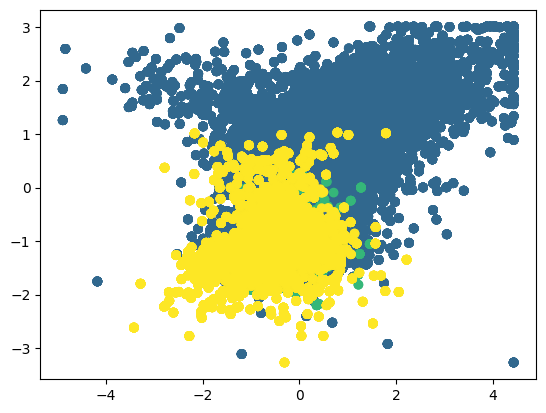

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y.astype('category').cat.codes, cmap='viridis', marker='o')
plt.show()



Support Vector Machine

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=2)
classifier = SVC(kernel="rbf", random_state=42)

In [10]:
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the SVM model:", accuracy)


Accuracy of the SVM model: 0.8939100259480414


Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Оцінка точності моделі
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9996873729952793


classification report

In [14]:
from sklearn.metrics import classification_report

# Оцінка моделі SVM
svm_pred = classifier.predict(X_test)
svm_report = classification_report(y_test, svm_pred)
print("Classification Report for SVM:")
print(svm_report)

# Оцінка моделі випадкового лісу
rf_pred = rf_classifier.predict(X_test)
rf_report = classification_report(y_test, rf_pred)
print("\nClassification Report for Random Forest:")
print(rf_report)


Classification Report for SVM:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97     10280
     running       0.93      0.90      0.92     33701
      stairs       1.00      0.00      0.01      1604
     walking       0.80      0.90      0.85     18389

    accuracy                           0.89     63974
   macro avg       0.92      0.70      0.69     63974
weighted avg       0.90      0.89      0.88     63974


Classification Report for Random Forest:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00     10280
     running       1.00      1.00      1.00     33701
      stairs       1.00      0.99      0.99      1604
     walking       1.00      1.00      1.00     18389

    accuracy                           1.00     63974
   macro avg       1.00      1.00      1.00     63974
weighted avg       1.00      1.00      1.00     63974

